<a href="https://colab.research.google.com/github/jakubtwalczak/dsbootcampudemy/blob/main/7_Uczenie_g%C5%82%C4%99bokie/3_Klasyfikacja_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wstęp.

W tym notebooku będziemy pracować z realnymi danymi ze zbioru Fashion-MNIST. Jest to zestaw danych z obrazkami artykułów Zalando - składający się z zestawu treningowego (60 000 przykładów) i zestawu testowego (10 000 przykładów). Każdy przykład to obraz w skali szarości 28 x 28, powiązany z jedną etykietą z 10 klas.

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

#### Przykładowe obrazy
<img src='https://storage.cloud.google.com/esmartdata-courses-files/ann-course/zalando10x10.jpeg' width=600>


# Import bibliotek.

Standardowo importujemy biblioteki, ustawiamy też pewne opcje dot. wyświetlania danych w bibliotece NumPy i Pandas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()

# Import i eksploracja danych.

Dane załadowane funkcją **load_data** są od razu podzielone na zbiór treningowy i testowy - odpowiednio 60000 i 10000 rekordów, zdjęcia w rozdzielczości 28 x 28 pikseli.

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

In [3]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train[0] shape: {X_train[0].shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: (28, 28)


Wyświetlamy pierwszy rekord - na obrazku widać, iż przynależy on do kategorii butów. Dla algorytmu będzie to jednak tablica pikseli o wartościach z przedziału 0-255.

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,  72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,  69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88, 172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0, 200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196, 229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245, 173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243, 202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12, 219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197, 209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99, 244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119, 167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55, 236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,  92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237, 226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,  77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228, 207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244, 159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217, 226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238, 215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200, 159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232, 246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,  80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228, 225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217, 241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224, 229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198, 213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221, 230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219, 221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205, 206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211, 210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177, 210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189, 188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216, 170,   0],
       [  2,   0,   0,   0,  66, 200, 222, 237, 239, 242, 246, 243, 244, 221, 220, 193, 191, 179, 182, 182, 181, 176, 166, 168,  99,  58,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  40,  61,  44,  72,  41,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

(-0.5, 27.5, 27.5, -0.5)

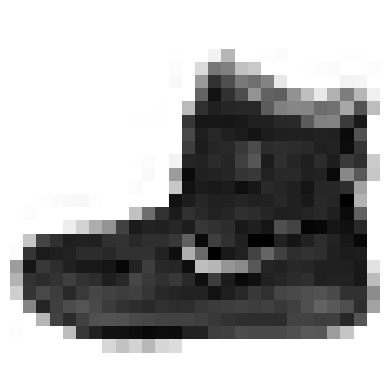

In [5]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

Wyświetlamy też pierwszą etykietę - jest to etykieta 9, tj. but za kostkę.

In [6]:
y_train[0]

9

Wyświetlmy też więcej obrazków razem z etykietami.

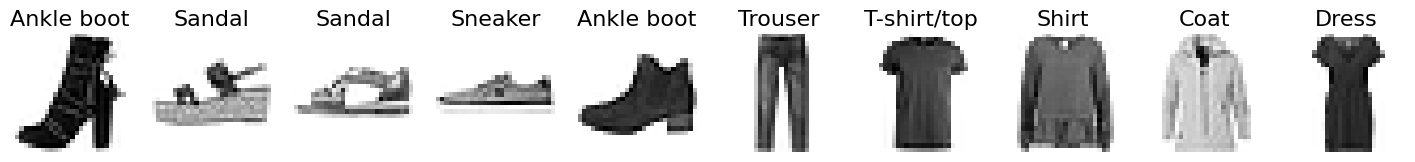

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(18, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i+10], cmap='gray_r')
    plt.title(class_names[y_train[i+10]], color='black', fontsize=16)
plt.show()

Przygotowujemy dane do modelu - normalizujemy piksele, przekształcamy etykiety na wektory z jedynką pod właściwym indeksem.

In [8]:
X_train = X_train / 255.
X_test = X_test / 255.

from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Budowa modelu.

Sieć budujemy i kompilujemy zgodnie z zasadami, o których mówiliśmy wcześniej. Warto zaznaczyć, że zakładamy, iż wszystkie obrazy będą mieć ten sam rozmiar (o czym świadczy wartość parametru input_shape) - gdyby jednak się okazało, że będziemy budować model z obrazami o różnych wymiarach, trzeba pamiętać o ich standaryzacji.

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Pora na trening modelu. Przekazaliśmy wartości parametrów epochs, batch_size i validation_split do metody fit.

In [10]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7636 - loss: 0.6833 - val_accuracy: 0.8473 - val_loss: 0.4319
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8556 - loss: 0.3976 - val_accuracy: 0.8674 - val_loss: 0.3743
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8728 - loss: 0.3476 - val_accuracy: 0.8586 - val_loss: 0.3933
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8804 - loss: 0.3333 - val_accuracy: 0.8807 - val_loss: 0.3452
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8872 - loss: 0.3112 - val_accuracy: 0.8783 - val_loss: 0.3622
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8901 - loss: 0.3035 - val_accuracy: 0.8777 - val_loss: 0.3578
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8967 - loss: 0.2916 - val_accuracy: 0.8827 - val_loss: 0.3411
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9009 - loss: 0.2757 -

# Ocena modelu.

Metryki modelu przypisujemy do ramki danych.

In [11]:
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics

,accuracy,loss,val_accuracy,val_loss,epoch
0,0.813563,0.528965,0.847333,0.431920,0
1,0.859062,0.387687,0.867417,0.374310,1
2,0.874000,0.347570,0.858583,0.393255,2
3,0.883875,0.326389,0.880667,0.345234,3
4,0.888625,0.312691,0.878333,0.362152,4
5,0.891021,0.302826,0.877667,0.357829,5
6,0.895458,0.291698,0.882750,0.341146,6
7,0.898521,0.283319,0.861917,0.423728,7
8,0.902958,0.275187,0.883083,0.382465,8
9,0.904750,0.268599,0.883250,0.378253,9


Zwizualizujmy na wykresie dokładność i stratę. Dokładność w zbiorze treningowym stabilnie rośnie, zaś na zbiorze walidacyjnym początkowo rośnie, po czym zaczyna się stabilizować na określonym poziomie (a nawet nieco spadać). Oznacza to, że model traci zdolność do dalszego uczenia się. Takich samych informacji dostarcza wykres funkcji straty.

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and Loss')
fig.show()

Przeprowadzamy ewaluację modelu na zbiorze testowym. Dokładność wynosi ok. 0,87, a więc model nie jest przetrenowany, jego zdolność do generalizacji jest na stabilnym poziomie.

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(test_acc)

0.8712999820709229


# Predykcja na podstawie modelu.

* **model.evaluate(y_true, y_pred)** - pozwala obliczyć metryki modelu,
* **model.predict()** - pozwala zwrócić prawdopodobieństwo danej klasy.

Tworzymy obiekt dataframe z wartościami prawdopodobieństwa dla każdej klasy każdego z rekordów.

In [14]:
predictions = model.predict(X_test)
predictions_df = pd.DataFrame(predictions)
predictions_df

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,0,1,2,3,4,5,6,7,8,9
0,0.000002,0.000000,0.000000,0.000005,0.000000,0.002647,0.000002,0.139750,0.000001,0.857594
1,0.000015,0.000000,0.999589,0.000000,0.000113,0.000000,0.000283,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.337612,0.000000,0.001205,0.000044,0.000086,0.000055,0.660857,0.000000,0.000141,0.000000
...,...,...,...,...,...,...,...,...,...,...
9995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000000,0.000122,0.000000,0.999866
9996,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9997,0.000304,0.000000,0.000007,0.000000,0.000000,0.000000,0.000013,0.000000,0.999675,0.000000
9998,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Dla każdego rekordu wyświetlimy przewidzianą klasę.

In [15]:
predictions_classes = predictions_df.idxmax(axis=1)
predictions_classes

,0
0,9
1,2
2,1
3,1
4,6
...,...
9995,9
9996,1
9997,8
9998,1


# Eksploracja predykcji.

Dzięki narzędziu dostępnemu w Google Colab możemy stworzyć slider umożliwiający poglądanie każdego rekordu. Wyświetlimy zdjęcia oraz wykres słupkowy, który pokaże, jakie prawdopodobieństwa przynależności do klas przyjął model dla rekordów.

In [16]:
#@title Wybierz indeks zdjęcia:
idx = 1302 #@param {type: 'slider', min:0, max:10000}

if predictions_classes[idx] == y_test[idx]:
    color = 'green'
else:
    color = 'red'

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, y=predictions_df.iloc[idx], orientation='v',
                     marker_color=color))
fig.update_layout(width=600, height=300,
                  title=f'Predykcja: {class_names[predictions_classes[idx]]}')
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[idx] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

Podobne rozwiązanie zastosujemy dla rekordów, gdzie nastąpiły błędne przewidywania modelu.

In [17]:
#@title Wybierz indeks zdjęcia:

misclassified = []
for idx, _ in enumerate(X_test):
    if predictions_classes[idx] != y_test[idx]:
        misclassified.append(idx)

index_mapper = {}


for idx, idx_real in enumerate(misclassified):
    index_mapper[idx] = idx_real

idx = 518 #@param {type: 'slider', min:0, max:1119}

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names,
                     y=predictions_df.iloc[index_mapper[idx]],
                     orientation='v',
                     marker_color='red'))

fig.update_layout(width=600, height=300,
                  title=(f' Etykieta: {class_names[y_test[index_mapper[idx]]]}'
                      f' ~ Predykcja: {class_names[predictions_classes[index_mapper[idx]]]}'))
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[index_mapper[idx]] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

# Podsumowanie.

Co może pomóc w poprawie predykcji modelu?
* zwiększenie liczby epok,
* zwiększenie/zmniejszenie parametrów uczenia, stronjenie hiperparametrów,
* zwiększenie/zmniejszenie liczby neuronów wewnątrz warstw ukrytych,
* zwiększenie/zmniejszenie parametru **batch_size**, czyli rozmiaru wsadu,
* zwiększenie/zmniejszenie liczby warstw ukrytych,
* zastosowanie regularyzacji (L1 - lasso, L2 - ridge), warstwy Dropout.